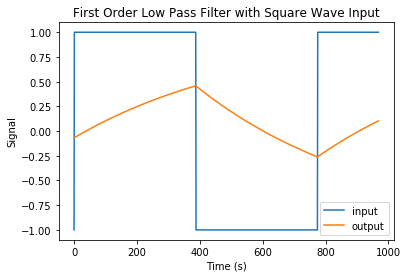

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

class LowPassFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.last_output = None

    def __call__(self, input):
        if self.last_output is None:
            self.last_output = input
            return input
        else:
            output = self.alpha * input + (1 - self.alpha) * self.last_output
            self.last_output = output
            return output

# Create a low pass filter with a time constant of 1 second
filter = LowPassFilter(1 - 0.9 ** (1 / 60))
# Simulate a square wave input signal
t0 = time.monotonic()
t = t0
period = 2.0
input_data = []
while t - t0 < 10:
    # Compute the input signal
    input = 1.0 if np.sin(0.5 * np.pi / period * (t - t0)) > 0 else -1.0
    # Apply the filter
    output = filter(input)
    # Store the input and output signals
    input_data.append(input)
    # Wait for the next iteration
    time.sleep(0.01)
    t = time.monotonic()

# Compute the output signal
output_data = [filter(input) for input in input_data]

# Plot the input and output signals
fig, ax = plt.subplots()
ax.plot(input_data, label='input')
ax.plot(output_data, label='output')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal')
ax.set_title('First Order Low Pass Filter with Square Wave Input')
plt.show()
